##Montamos el Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("/content/drive/MyDrive/datasets/MisDatasets/House_Price_India.csv")

dataset.head()

## verificamos el precio mas alto y mas bajo de las casas
print(dataset['Price'].max(), dataset['Price'].min())

# Filtrar el dataset para obtener solo las casas con precios en el rango
rango_razonable = dataset[(dataset['Price'] >= 78000) & (dataset['Price'] <= 300000)]
rango_moderado = dataset[(dataset['Price'] >= 300001) & (dataset['Price'] <= 400000)]
rango_alto = dataset[(dataset['Price'] >= 400001) & (dataset['Price'] <= 525000)]
rango_muyalto = dataset[(dataset['Price'] >= 525001) & (dataset['Price'] <= 725000)]
rango_lujoextremo = dataset[(dataset['Price'] >= 725001) & (dataset['Price'] <= 7700000)]

# Contar cuántos datos están en ese rango
cantidad_razonable = rango_razonable.shape[0]
cantidad_moderado = rango_moderado.shape[0]
cantidad_alto = rango_alto.shape[0]
cantidad_muyalto = rango_muyalto.shape[0]
cantidad_lujoextremo = rango_lujoextremo.shape[0]

print(f'Cantidad de casas en el rango de 78000 a 300000: {cantidad_razonable}')
print(f'Cantidad de casas en el rango de 300001 a 400000: {cantidad_moderado}')
print(f'Cantidad de casas en el rango de 400001 a 525000: {cantidad_alto}')
print(f'Cantidad de casas en el rango de 525001 a 725000: {cantidad_muyalto}')
print(f'Cantidad de casas en el rango de 725001 a 7700000: {cantidad_lujoextremo}')

# Agregamos una columna para definir las clases segun un rango de precio, lambda define una funcion anonima
dataset["Clasificacion"] = dataset['Price'].apply(lambda x: 0 if x in range(78000, 300001)
                                                            else 1 if x in range(300001, 400001)
                                                            else 2 if x in range(400001, 525001)
                                                            else 3 if x in range(525001, 725001)
                                                            else 4)

# Creamos una copia del dataset ya incorporado la columna
data = dataset.copy()
data

7700000 78000
Cantidad de casas en el rango de 78000 a 300000: 3113
Cantidad de casas en el rango de 300001 a 400000: 2875
Cantidad de casas en el rango de 400001 a 525000: 2987
Cantidad de casas en el rango de 525001 a 725000: 2946
Cantidad de casas en el rango de 725001 a 7700000: 2699


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,4
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,4
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,4
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,4
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,122066,52.6191,-114.472,2250,17286,3,76,221700,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,122072,52.5075,-114.393,1540,7480,3,59,219200,0
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,122056,52.7289,-114.507,1130,6120,2,64,209000,0
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,122042,52.7157,-114.411,1420,6631,3,54,205000,0


## 1. Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [ ]:
# Generar atributo tipo caracter ficticio
data['Tipo de Escuela'] = data['Number of schools nearby'].apply(lambda x: 'A' if x == 1
                                                          else 'B' if x == 2
                                                          else 'C')

# Generar atributo de texto ficticio
data['Estado neutral'] = data['condition of the house'].apply(lambda x: 'Muy deteriorado' if x == 1
                                                              else 'Deteriorado' if x == 2
                                                              else 'Regular' if x == 3
                                                              else 'Buen estado' if x == 4
                                                              else 'Excelente estado')

# Generar valores Booleanos
data['Cerca del Aeropuerto'] = data['Distance from the airport'].apply(lambda x: 1 if x in range(50,66) else 0)

data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,-114.557,2880,5400,2,58,2380000,4,B,Excelente estado,1
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,-114.470,2470,4000,2,51,1400000,4,B,Excelente estado,1
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,-114.468,2940,6600,1,53,1200000,4,A,Regular,1
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,-114.321,3350,42847,3,76,838000,4,C,Regular,0
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,-114.485,2060,4500,1,51,805000,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,-114.472,2250,17286,3,76,221700,0,C,Buen estado,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,-114.393,1540,7480,3,59,219200,0,C,Buen estado,1
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,-114.507,1130,6120,2,64,209000,0,B,Regular,1
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,-114.411,1420,6631,3,54,205000,0,C,Buen estado,1


##2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [ ]:
# Duplicar el dataset con variaciones mínimas en los valores de los píxeles
data_duplicado = data.copy()
print('Dataset original')
print(data.shape)

# generar matriz de numeros aleatorios con distribucion normal, con media de 0 y desviacion estandar 0.05
data_duplicado.iloc[:, :23] += np.random.normal(0, 0.05, size=(data_duplicado.shape[0], 23))

# Concatenar el dataset original y duplicado
synthetic_dataset = pd.concat([data, data_duplicado], ignore_index=True) # reorganizar el dataframe para no tener indices repetidos

print('Datos del Dataset sintetico')
print(synthetic_dataset.shape)
synthetic_dataset


Dataset original
(14620, 27)
Datos del Dataset sintetico
(29240, 27)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,B,Excelente estado,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,B,Excelente estado,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,A,Regular,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,C,Regular,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.019372,1.996314,1.490226,1555.951350,19999.931552,1.061362,-0.029623,-0.034079,4.052921,...,-114.434937,2249.918303,17285.932684,3.030789,76.032567,2.217001e+05,0,C,Buen estado,0
29236,6.762830e+09,42733.964040,2.966457,1.891573,1679.962352,6999.899229,1.485154,0.005962,-0.102209,3.993613,...,-114.445320,1540.051387,7479.972183,3.019655,58.983870,2.192000e+05,0,C,Buen estado,1
29237,6.762831e+09,42734.023992,1.975741,0.919258,1070.014440,6120.062666,0.978412,0.044073,0.078490,3.026973,...,-114.421151,1129.966726,6120.022173,1.998779,63.998883,2.090001e+05,0,B,Regular,1
29238,6.762831e+09,42733.988445,4.002029,1.009429,1029.928494,6620.950500,0.945728,0.028593,-0.037090,3.970917,...,-114.473756,1419.997651,6630.996001,2.905831,54.029405,2.049999e+05,0,C,Buen estado,1


##3. Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

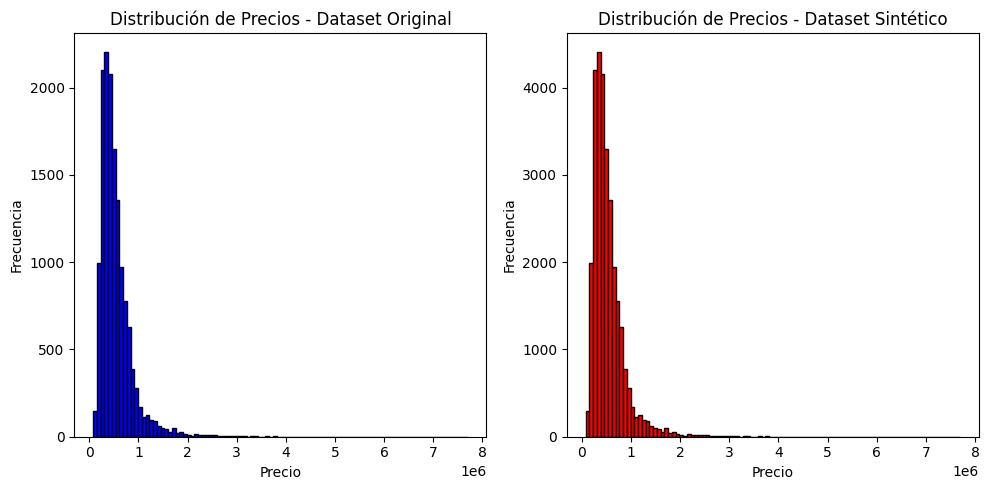

In [ ]:
import matplotlib.pyplot as plt

# Configuración para visualización
plt.figure(figsize=(10, 5))

# Gráfico del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Price'], bins=100, color='blue', edgecolor='black') #histograma con 100 numeros de intervalo
plt.title('Distribución de Precios - Dataset Original')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Gráfico del dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_dataset['Price'], bins=100, color='red', edgecolor='black')
plt.title('Distribución de Precios - Dataset Sintético')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajusta automaticamente el diseño de la grafica para que no se superpongan
plt.show()


In [ ]:
# Convertir 'Tipo de Escuela' a números únicos
# 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
synthetic_dataset['Tipo de Escuela'] = synthetic_dataset['Tipo de Escuela'].astype('category').cat.codes
synthetic_dataset['Estado neutral'] = synthetic_dataset['Estado neutral'].astype('category').cat.codes

synthetic_dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,1,2,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,1,2,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,0,4,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,2,4,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.019372,1.996314,1.490226,1555.951350,19999.931552,1.061362,-0.029623,-0.034079,4.052921,...,-114.434937,2249.918303,17285.932684,3.030789,76.032567,2.217001e+05,0,2,0,0
29236,6.762830e+09,42733.964040,2.966457,1.891573,1679.962352,6999.899229,1.485154,0.005962,-0.102209,3.993613,...,-114.445320,1540.051387,7479.972183,3.019655,58.983870,2.192000e+05,0,2,0,1
29237,6.762831e+09,42734.023992,1.975741,0.919258,1070.014440,6120.062666,0.978412,0.044073,0.078490,3.026973,...,-114.421151,1129.966726,6120.022173,1.998779,63.998883,2.090001e+05,0,1,4,1
29238,6.762831e+09,42733.988445,4.002029,1.009429,1029.928494,6620.950500,0.945728,0.028593,-0.037090,3.970917,...,-114.473756,1419.997651,6630.996001,2.905831,54.029405,2.049999e+05,0,2,0,1


##4. Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
train_data, test_data = train_test_split(synthetic_dataset, test_size=0.2, random_state=42)
print(f'Datos de entrenamiento: {train_data.shape}')
print(f'Datos de prueba: {test_data.shape}')

# Dividimos los datos para X_test y y_test donde se utilizaran los datos para las pruebas
X_test = test_data.iloc[:, np.r_[2:23,24:27]]
y_test = test_data.iloc[:, 23]
# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, np.r_[2:23,24:27]]
y_train = train_data.iloc[:, 23]

m = y_train.size

Datos de entrenamiento: (23392, 27)
Datos de prueba: (5848, 27)


##5. Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [ ]:
def datasetsCreate(y):
    data = {}
    # Convertir la Serie en un DataFrame y asignar un nombre de columna
    y = y.to_frame(name='Clasificacion')
    for i in range(5):
        # Crear un nuevo DataFrame basado en la condición de la clase actual
        data_modified = y.copy()  # Copiar el DataFrame original
        data_modified['Clasificacion'] = np.where(y['Clasificacion'] == i, 1, 0)  # Reemplazar valores
        data[f'data_{i}'] = data_modified  # Almacenar el DataFrame en el diccionario con una clave adecuada

    # Retornar los 5 DataFrames
    return data['data_0'], data['data_1'], data['data_2'], data['data_3'], data['data_4']

In [ ]:
y1_train, y2_train, y3_train, y4_train, y5_train = datasetsCreate(y_train)

## Para la clase 0: y = 1, caso contrario: y = 0

In [ ]:
concat1 = pd.concat([y1_train, y_train], axis=1) # concatenacion horizontal
concat1

,Clasificacion,Clasificacion
16640,0,1
26583,1,0
19669,0,1
7497,1,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 1: y = 1, caso contrario: y = 0

In [ ]:
concat2 = pd.concat([y2_train, y_train], axis=1)
concat2

,Clasificacion,Clasificacion
16640,1,1
26583,0,0
19669,1,1
7497,0,0
11624,0,4
...,...,...
21575,1,1
5390,0,4
860,0,2
15795,1,1


##Para la clase 2: y = 1, caso contrario: y = 0

In [ ]:
concat3 = pd.concat([y3_train, y_train], axis=1)
concat3

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,1,2
15795,0,1


##Para la clase 3: y = 1, caso contrario: y = 0

In [ ]:
concat4 = pd.concat([y4_train, y_train], axis=1)
concat4

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 4: y = 1, caso contrario: y = 0

In [ ]:
concat5 = pd.concat([y5_train, y_train], axis=1)
concat5

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,1,4
...,...,...
21575,0,1
5390,1,4
860,0,2
15795,0,1


In [ ]:
y1_test, y2_test, y3_test, y4_test, y5_test = datasetsCreate(y_test)
y1_test

,Clasificacion
13599,0
963,0
25666,0
1412,0
15962,0
...,...
11876,1
5503,0
16196,0
1809,0


#Realizamos la regresion logistica

##<li>Calcular la funcion sigmoidea</li>

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_train_norm, mu, sigma = featureNormalize(X_train)
X_train_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
16640,0.627093,-0.386265,0.101943,-0.198436,-0.812202,-0.583437,-0.320459,2.335326,-0.563446,-0.839523,...,-0.915381,-0.408927,-0.577024,-0.268819,1.227399,0.343651,-0.444986,1.211579,-0.425885,-1.033566
26583,-0.491669,-1.516225,-0.813618,-0.204074,-0.070471,-1.348245,-0.467156,-0.658060,-1.394562,-0.553965,...,-0.301119,-0.478915,-1.137197,-0.210717,1.220500,-1.228196,-0.911751,1.211579,0.715796,0.967524
19669,-0.435259,-1.356498,-1.164927,-0.154922,-1.026041,-0.017208,-0.348128,0.804942,-0.616558,-0.946599,...,0.393334,0.605243,-1.108349,-0.201385,1.247294,-0.995714,-0.538312,1.211579,-1.567567,0.967524
7497,0.650326,0.474574,-0.259997,-0.228596,0.920466,-0.079702,-0.306772,0.856729,-0.585539,0.064576,...,-1.504663,1.265245,-0.203607,-0.242257,1.210602,0.229292,-0.668969,1.211579,-1.567567,-1.033566
11624,-0.402909,0.474574,0.644960,0.216406,-0.931971,-0.079702,4.863854,-0.647346,1.105327,0.326295,...,1.397897,-1.093614,0.615009,0.284738,1.210602,0.564903,1.218892,1.211579,0.715796,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.582779,-0.679428,-1.175660,-0.205647,0.108298,-0.818960,-0.378833,0.856682,-1.430204,-0.958404,...,1.102092,-0.388222,-1.036600,-0.213050,1.188227,-0.661866,-0.631638,1.211579,-1.567567,0.967524
5390,-0.402909,0.151467,1.241167,4.011739,0.920466,-0.079702,-0.306772,0.856729,1.950761,1.741955,...,-0.302315,0.161244,1.749581,-0.183378,-0.013418,-1.448762,0.554941,-0.013300,-1.567567,0.967524
860,-1.456145,0.474574,-0.845558,-0.355144,0.920466,-0.079702,-0.306772,-0.647346,0.259894,-0.768165,...,0.342934,-0.647899,-0.979137,-0.431572,-1.237439,-0.441930,-0.111677,-1.238180,0.715796,0.967524
15795,0.685449,0.733491,-0.323917,-0.251467,-0.830423,-0.648225,-0.365030,-0.573221,-0.580383,-0.899101,...,-0.354275,0.158434,-0.261035,-0.224716,-1.092887,1.006678,-0.526313,-1.238180,0.715796,-1.033566


##Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

In [ ]:
print(X_ready.shape)

(23392, 25)


## Funcion para calcular los costos
Se utiliza para calcular el costo o la función de pérdida en un modelo de regresión logística

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T)) # Predecir las probabilidades usando la función sigmoide
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) # Calcular el costo

    return J

##Funcion para calcular el descenso de gradiente
Este algoritmo minimiza la función de costo ajustando los valores de theta


In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T)) # Calcula la hipótesis h utilizando la función sigmoid
        theta = theta - (alpha / m) * (h - y).dot(X) # Actualiza theta usando la regla de actualización del descenso por el gradiente

        J_history.append(calcularCosto(theta, X, y)) # Calcula el costo con los parámetros actuales y lo añade al historial
    return theta, J_history

In [ ]:
y1_train = y1_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.39655295e+00 -4.69783303e-02 -1.69901445e-01 -1.81361298e-01
 -7.02705500e-02 -1.73842386e-01 -2.21710688e-02 -9.43019906e-02
 -9.36200582e-02 -2.96132694e-01 -1.30474978e-01 -1.34501445e-01
  5.86252440e-02 -3.15203786e-02  2.97795965e-01 -7.06076693e-01
  1.88678154e-02 -2.19144891e-01 -5.77188940e-02  5.25932021e-03
 -1.03920041e-03 -4.03990968e-01  4.94603259e-03  1.53570593e-02
  1.16522793e-02]


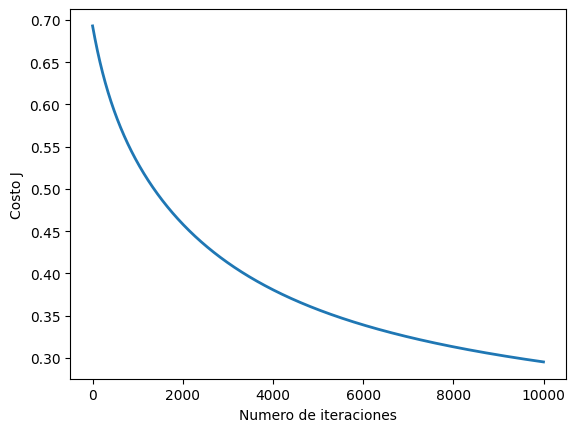

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X_ready, y1_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#Realizamos pruebas

In [ ]:
# Normalizamos X_test
X_test_norm = (X_test - mu) / sigma
m_test = X_test.shape[0]
X_test_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
13599,-1.456145,0.151467,-0.760386,-0.362435,2.772903,-0.079702,-0.306772,-0.647346,-0.585539,-0.554031,...,0.795665,0.641245,-0.749350,-0.439816,-1.237439,-1.225022,-0.205003,-1.238180,0.715796,0.967524
963,-1.456145,-1.464068,-1.420472,-0.289575,-0.931971,-0.079702,-0.306772,2.360804,-2.276406,-1.232121,...,0.940229,-1.025042,-0.835521,-0.297052,1.210602,-1.672503,-0.342326,1.211579,-0.425885,0.967524
25666,0.617952,0.430677,0.943104,-0.233316,0.956975,-0.293261,-0.261669,-0.728588,0.256823,1.408797,...,-2.753526,-0.659707,0.844643,-0.239807,-1.150051,1.355923,-0.444986,-1.238180,0.715796,-1.033566
1412,0.650326,2.090108,1.124055,-0.144668,1.846685,-0.079702,-0.306772,-0.647346,1.950761,1.611096,...,-0.001904,-0.044470,0.571924,-0.122632,1.210602,1.571735,2.234818,1.211579,0.715796,-1.033566
15962,-0.469013,-0.437201,-0.856108,-0.326818,-0.880307,-0.160157,-0.314020,2.328733,-0.617009,-1.172635,...,1.036658,-0.106343,-1.180179,-0.383386,1.233658,0.565824,-0.213002,1.211579,-0.425885,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,-0.402909,-0.494747,-0.728446,-0.358790,0.920466,-0.079702,-0.306772,-0.647346,-0.585539,-1.006091,...,0.041113,-0.682185,-0.950414,-0.440827,-1.237439,0.005551,-0.660969,-1.238180,0.715796,0.967524
5503,-0.402909,-0.494747,0.080692,-0.126414,-0.931971,-0.079702,2.278541,0.856729,-0.585539,-0.791957,...,0.182856,-0.229613,0.255967,-0.161133,-0.013418,-1.001281,0.434950,-0.013300,-1.567567,0.967524
16196,-0.443566,0.528623,0.155225,-0.295947,0.958292,-0.383064,-0.339571,-0.657718,-0.593381,0.528432,...,-0.729090,0.840418,0.356549,-0.315873,-1.298239,1.349654,-0.391656,-1.238180,0.715796,-1.033566
1809,0.650326,-0.494747,-0.409049,-0.283281,-0.005752,-0.079702,-0.306772,0.856729,-0.585539,-0.411276,...,0.115863,-0.545042,-0.103075,-0.326608,-0.013418,-1.448762,-0.005018,-0.013300,-1.567567,0.967524


In [ ]:
# Concatenamos numeros unos
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
X_test_ready

array([[ 1.        , -1.45614451,  0.15146662, ..., -1.23817962,
         0.71579592,  0.96752431],
       [ 1.        , -1.45614451, -1.46406824, ...,  1.21157913,
        -0.42588539,  0.96752431],
       [ 1.        ,  0.61795168,  0.43067747, ..., -1.23817962,
         0.71579592, -1.03356576],
       ...,
       [ 1.        , -0.44356643,  0.52862321, ..., -1.23817962,
         0.71579592, -1.03356576],
       [ 1.        ,  0.65032597, -0.49474732, ..., -0.01330025,
        -1.5675667 ,  0.96752431],
       [ 1.        , -0.40313957, -1.47057792, ..., -0.01330025,
        -1.5675667 ,  0.96752431]])

In [ ]:
y_pred = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred.append(sigmoid(np.dot(i, theta)))

y_pred = np.array(y_pred)
y_pred

array([0.13217396, 0.32661505, 0.55335458, ..., 0.28259509, 0.29419791,
       0.64204992])

In [ ]:
umbral = (y_pred >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y1_test = y1_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [ ]:
# Crear un DataFrame
df_resultados = pd.DataFrame({'y_test': y1_test, 'prediccion': umbral})

# Mostrar el DataFrame
df_resultados

,y_test,prediccion
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
5843,1,1
5844,0,0
5845,0,0
5846,0,0


In [ ]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y1_test, umbral)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 90.87%
